In [5]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [4]:
def my_dft(uj):
    """Compute discrete Fourier transform given discrete data values.
    
    :param uj:
        Data values in discrete space. Assumed to be 1D array.
    """
    
    j, uj = np.arange(len(uj)), np.array(uj)
    
    return np.array([sum(uj * np.exp(-2j*np.pi/N * j*l)) for l in j])

def my_idft(uj):
    """Compute inverse discrete Fourier transform given discrete data values.
    
    :param uj:
        Data values in discrete space. Assumed to be 1D array.
    """
    
    j, uj = np.arange(len(uj)), np.array(uj)/N
    
    return np.array([sum(uj * np.exp(2j*np.pi/N * j*l)) for l in j])

In [16]:
N = 10
L = 2 * np.pi
xj = np.linspace(0, L, N + 1)[:-1]
xj1 = np.linspace(0, L, N + 1)
print(len(xj))
#print(len(xj1))

10


In [22]:
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0)])
kl
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
i, kl

((5, 6, 7, 8, 9, 0, 1, 2, 3, 4),
 (-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0))

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[-2.22044605e-16+0.00000000e+00j -5.55111512e-16-4.44089210e-16j
  1.00000000e+01+0.00000000e+00j -3.33066907e-16+0.00000000e+00j
 -2.77555756e-16+0.00000000e+00j -2.77555756e-16-2.22044605e-16j
 -1.11022302e-16-5.55111512e-16j -1.11022302e-16-4.27605938e-15j
  2.22044605e-16-7.77156117e-16j -5.05151476e-15+3.10862447e-15j]
[-2.77555756e-16-2.22044605e-16j -1.11022302e-16-5.55111512e-16j
 -1.11022302e-16-4.27605938e-15j  2.22044605e-16-7.77156117e-16j
 -5.05151476e-15+3.10862447e-15j -2.22044605e-16+0.00000000e+00j
 -5.55111512e-16-4.44089210e-16j  1.00000000e+01+0.00000000e+00j
 -3.33066907e-16+0.00000000e+00j -2.77555756e-16+0.00000000e+00j]


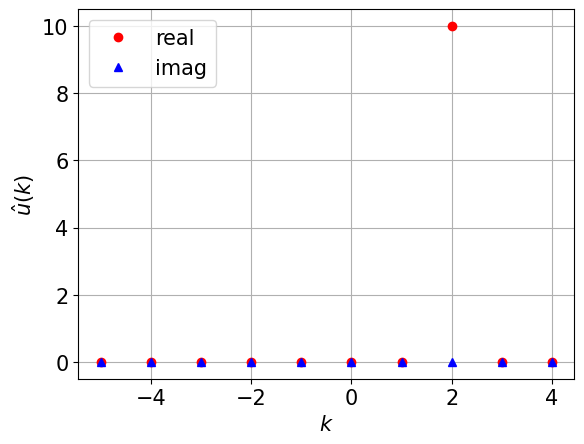

In [38]:
N  = 10
L  = 2*np.pi

# data points
xj = np.linspace(0, L, N + 1)[:-1] # exclude the end point
                                   # because u(2π) == u(0) by definition
uj = np.exp(2j*xj)

# DFT
Ul = my_dft(uj)

# k space = [0, dk, 2*dk, ..., -2*dk, -dk]
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L 
print(kl)

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
print(Ul)
Ul = Ul[i,]
print(Ul)
plt.figure()
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.grid()
plt.show()

In [39]:
N  = 10
L  = 2*np.pi
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L 
print(kl)

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]


In [41]:
# Parseval's theorem
lhs = sum(abs(uj)**2)
rhs = np.mean(abs(Ul)**2)

print(f"""
lhs = {lhs}, rhs = {rhs}
""")


lhs = 10.0, rhs = 10.0



In [43]:
# Check if IDFT gives the original data
iUl = my_idft(Ul[i,]) #변환 시킨 데이터를 푸리에 변환시켰을 때

print(uj - iUl)

[ 6.66133815e-16+3.16583636e-16j  6.66133815e-16-5.55111512e-16j
 -2.22044605e-16-7.77156117e-16j -5.55111512e-16-1.11022302e-16j
 -3.33066907e-16+1.11022302e-16j -4.44089210e-16-5.01301097e-17j
 -4.99600361e-16+5.55111512e-16j  4.44089210e-16+7.77156117e-16j
  8.88178420e-16-1.11022302e-16j  1.66533454e-16-1.11022302e-16j]


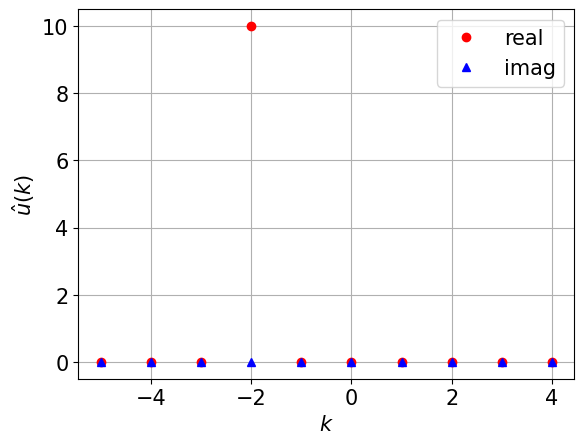

In [49]:
N  = 10
L  = 2*np.pi

xj = np.linspace(0, L, N + 1)[:-1]
uj = np.exp(-2j*xj)

Ul = my_dft(uj)
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
Ul = Ul[i,]

plt.figure()
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.grid()
plt.show()

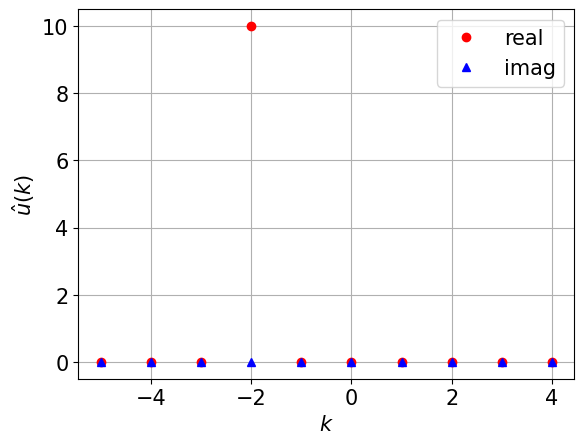

In [51]:
N  = 10
L  = 2*np.pi

xj = np.linspace(0, L, N + 1)[:-1]
uj = np.exp(8j*xj)

Ul = my_dft(uj)
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
Ul = Ul[i,]

plt.figure()
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.grid()
plt.show()

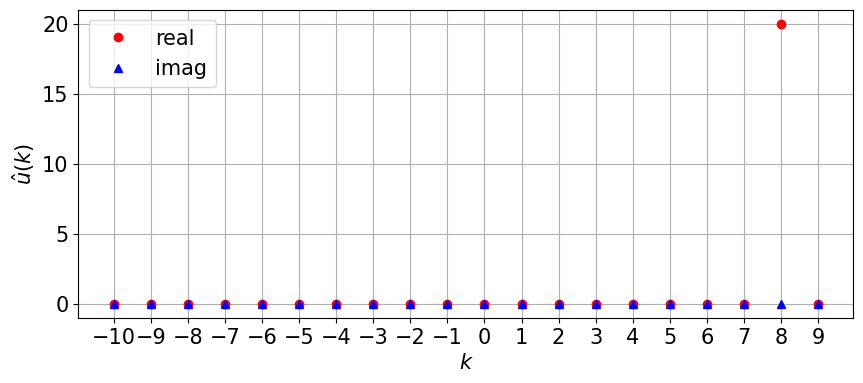

In [59]:
N  = 10 * 2
L  = 2*np.pi

xj = np.linspace(0, L, N + 1)[:-1]
uj = np.exp(8j*xj)

Ul = my_dft(uj)
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
Ul = Ul[i,]

plt.figure(figsize=[10, 4])
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.xticks(np.linspace(min(kl), max(kl), N))
plt.grid()
plt.show()

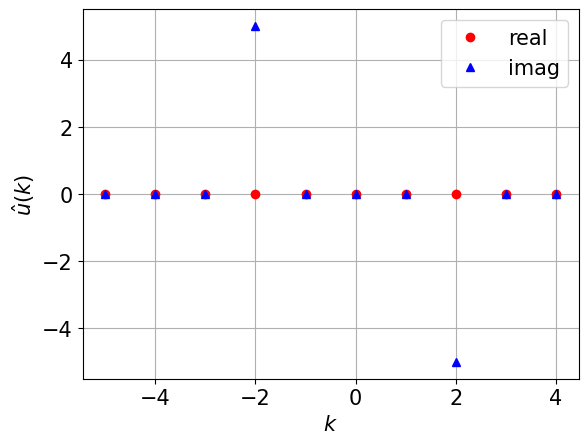

In [60]:
N  = 10
L  = 2*np.pi

xj = np.linspace(0, L, N + 1)[:-1]
uj = np.sin(2*xj)

Ul = my_dft(uj)
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
Ul = Ul[i,]

plt.figure()
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.grid()
plt.show()


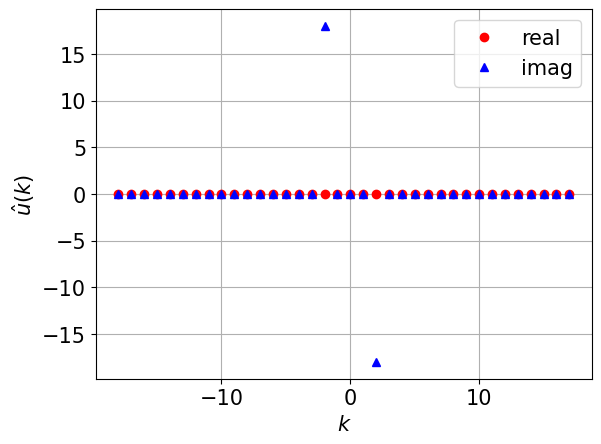

In [66]:
N  = 36
L  = 2*np.pi

xj = np.linspace(0, L, N + 1)[:-1]
uj = np.sin(2*xj)

Ul = my_dft(uj)
kl = np.hstack([
    np.arange(0, N/2),       # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# sort in ascending order of k
i, kl = zip(*sorted(enumerate(kl), key=lambda x: x[1]))
Ul = Ul[i,]

plt.figure()
plt.plot(kl, Ul.real, "or", kl, Ul.imag, "^b")
plt.legend(["real", "imag"])
plt.xlabel("$k$")
plt.ylabel("$\\hat{u}(k)$")
plt.grid()
plt.show()
